<center><h1> Incident Data - Exploratory Data Analysis</h1></center>

In [1]:
# Load packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core import display as ICD
import math
sns.set(style="whitegrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [2]:
# Load in excel data and mark <null> as null values so they don't load as strings
df = pd.read_excel('IncidentData_Fake.xlsx',na_values='<null>')

# Export data to CSV with correctly labeled null values for Tableau
df.to_csv('IncidentData_Fake.csv',index=False)

In [3]:
# 13407 Rows with 20 Columns
print(df.shape)
print(df.columns.values.tolist())

(13407, 20)
['ir_id', 'mnth', 'mnth_day', 'report_date', 'start_date', 'end_date', 'close_date', 'IR_Status', 'time_zone', 'time_zone_description', 'time_zone_detailed_description', 'ir_type_name', 'assignee_region', 'createor_region', 'advisory_type', 'targeted_at_uber', 'was_there_biz_disruption', 'incident_tier', 'resolution_time', 'first_response_time']


In [4]:
# Only show count of null values for the columns with null values
pd.DataFrame(df.loc[:,df.isnull().sum()>0].isnull().sum(),columns=['Number of Null Values'])

,Number of Null Values
end_date,3560
close_date,3166
advisory_type,11842
targeted_at_uber,11866
was_there_biz_disruption,4443


In [5]:
# Quick glance at data
df.head()

,ir_id,mnth,mnth_day,report_date,start_date,end_date,close_date,IR_Status,time_zone,time_zone_description,time_zone_detailed_description,ir_type_name,assignee_region,createor_region,advisory_type,targeted_at_uber,was_there_biz_disruption,incident_tier,resolution_time,first_response_time
0,1,2018-08-17,2017-08-30 00:00:00,2017-08-30 17:11:00,2017-08-07 09:11:00,NaT,2017-02-04 01:54:00,Closed IR,PST,Pacific Standard Time,(GMT-08.0) Pacific Standard Time,Government Official Onsite,APAC,NORAM,NaN,NaN,NaN,2,0,376755
1,2,2018-06-17,2017-06-06 19:43:00,2017-06-06 19:43:00,2017-06-05 00:07:00,2017-06-06 09:21:00,2017-02-16 07:48:00,Closed IR,EST,Eastern Standard Time,(GMT-04.0) Eastern Standard Time,Suspicious Person,NORAM,NORAM,NaN,NaN,YES,2,0,0
2,3,2018-07-17,2017-07-25 18:02:00,2017-07-25 18:02:00,2017-07-24 04:22:00,2017-07-30 22:57:00,2017-03-07 05:50:00,Closed IR,GMT,Greenwich Mean Time,(GMT-00.0) Greenwich Mean Time,Vehicle Incident,APAC,EMEA,NaN,NaN,NaN,2,0,419230
3,4,2018-06-17,2017-06-11 20:19:00,2017-06-11 20:19:00,2017-06-09 20:58:00,2017-06-15 10:32:00,2017-01-16 14:20:00,Closed IR,EST,Eastern Standard Time,(GMT-04.0) Eastern Standard Time,Advisory,INDIA,INDIA,NaN,NaN,NaN,1,0,116037
4,5,2018-01-17,2017-01-09 01:18:00,2017-01-09 01:18:00,2017-01-07 13:56:00,2017-01-13 16:11:00,2017-11-21 11:53:00,Open IR,PST,Pacific Standard Time,(GMT-08.0) Pacific Standard Time,Medical Issue,APAC,INDIA,NaN,NaN,NO,1,0,368573


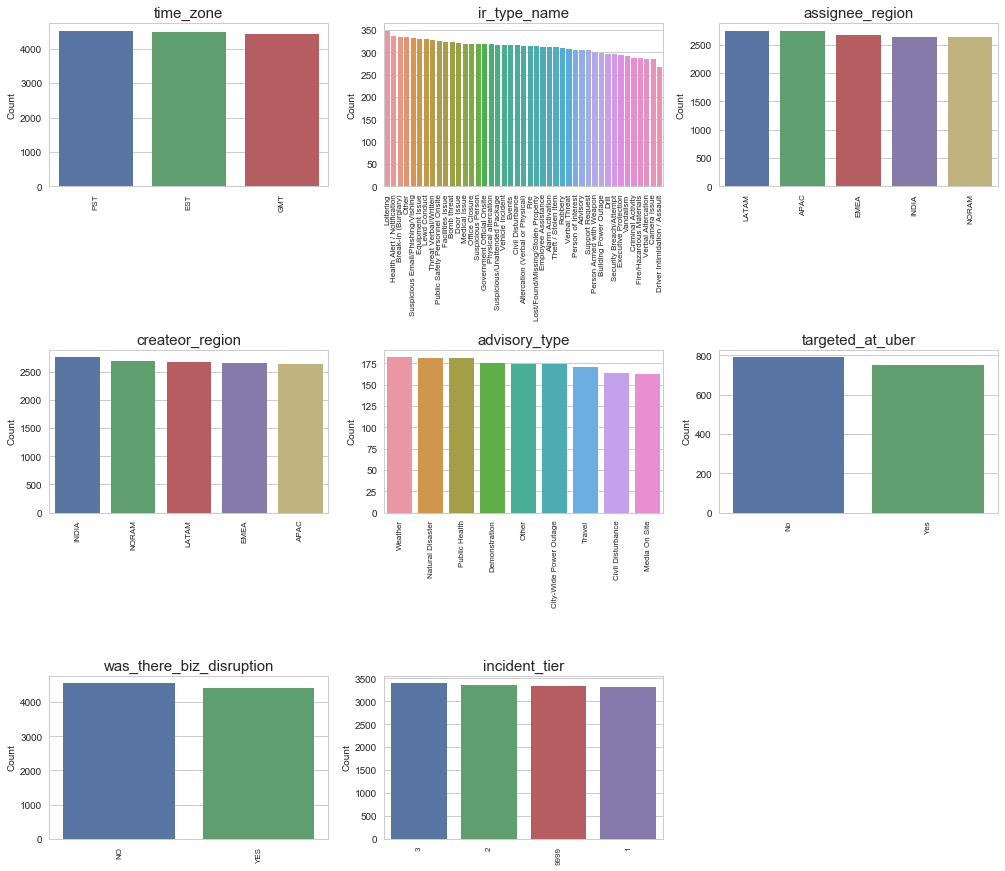

In [6]:
categorical = ['time_zone','ir_type_name','assignee_region','createor_region','advisory_type',
             'targeted_at_uber','was_there_biz_disruption','incident_tier',]
def plot_cat(df):
    import math
    fig = plt.figure(figsize=(17,15))
    plt.subplots_adjust(hspace=1)
    
    for i,feature in enumerate(categorical):
        plt.subplot(math.ceil(len(categorical)/3),3,i+1)
        ax = sns.countplot(df[feature], order=df[feature].value_counts().index)
        
        ax = plt.title(str(feature), size=15)
        _ = plt.xlabel('',fontsize=0)
        _ = plt.xticks(size=8,rotation=90)
        _ = plt.ylabel('Count',fontsize=10)
        _ = plt.yticks(size=10)
        
plot_cat(df)

## First Thoughts

My first thoughts of the dataset is that everything seems to be nearly evenly distributed / randomly distributed across each of the columns. This will make it hard to provide any conclusive insights or recommendations, since most likely the values are all due to chance.

### Exploration Ideas

* <b>Day of the week / Hour of Day</b>:  Are certain days/hours more prone to incidents in general? What about specific incidents? Understanding what type of incidents are likely occur during a specific day and time will allow Security teams to be better prepared and more likely to prevent incidents from escalating and possibly disrupting business.
* <b>Advisory Type</b>: How often are advisories issued and do they prevent business disruptions or decrease incident's duration?
* <b>Assignee Regions</b>: What regions (assignee_region) have the most open reports or the longest report durations? Figuring out what regions are the most efficient and then investigating as to why, could lead to process improvements.
* <b>Trending Incidents</b>: 
    * Are there specific types of incidents that are seeing an increasing trend?  Seeing in growing trend in specific incidents could allow Uber to train security teams accordingly to notice and prevent situation from escalating
    * If we are able to notice growing trends of targeted incidents in regions this could allow Uber to proactively market in order to mend the relations.


### <i>Future Possible Predictive Analytics
* Predicting the estimated time to complete a report based on multiple factors will give the assigned employees and managers and better target time to close reports.


# Add New Columns

In [7]:
df['Weekday_of_Incident'] = df.start_date.dt.day_name()
df['Hour_of_Incident'] = df.start_date.dt.hour
df['First_Response_Time_Hours'] = df.first_response_time/3600
df['Resolution_Time_Hours'] = df.resolution_time/3600
df.drop(columns=['time_zone_description','time_zone_detailed_description','mnth','mnth_day'], inplace=True)

In [8]:
# Recreate groupings with new columns
categorical = ['time_zone','ir_type_name','assignee_region','createor_region','advisory_type',
             'targeted_at_uber','was_there_biz_disruption','incident_tier','Weekday_of_Incident','Hour_of_Incident',]

numerical = ['First_Response_Time_Hours','Resolution_Time_Hours']

datetime = ['report_date','close_date','start_date','end_date']

for item in categorical:

    ICD.display(pd.DataFrame(df[item].value_counts()))

,time_zone
PST,4504
EST,4489
GMT,4414


,ir_type_name
Loitering,347
Health Alert / Notification,337
Break-In (Burglary),334
Other,333
Suspicious Email/Phishing/Vishing,331
Equipment Issue,329
Lewd Conduct,329
Threat Verbal/Written,328
Public Safety Personnel Onsite,325
Facilities Issue,322


,assignee_region
LATAM,2737
APAC,2733
EMEA,2669
INDIA,2635
NORAM,2633


,createor_region
INDIA,2752
NORAM,2690
LATAM,2670
EMEA,2653
APAC,2642


,advisory_type
Weather,182
Natural Disaster,181
Public Health,181
Demonstration,175
Other,174
City-Wide Power Outage,174
Travel,171
Civil Disturbance,164
Media On Site,163


,targeted_at_uber
No,790
Yes,751


,was_there_biz_disruption
NO,4547
YES,4417


,incident_tier
3,3390
2,3364
9999,3342
1,3311


,Weekday_of_Incident
Thursday,2008
Sunday,1976
Saturday,1924
Wednesday,1894
Monday,1891
Tuesday,1858
Friday,1856


,Hour_of_Incident
13,595
7,588
9,580
0,579
3,578
6,575
11,573
4,572
23,568
18,564


## Data Quality

#### First Response Time
It is not possible for there to be a response before the incident occurred so these 635 records must have been inputted erroneously. No categorical column stands out to answer why this error may be occurring. I would want to reach out the a few of the report creators and see why they may have input the response time incorrectly and see if there is a way to automate these errors with the appropriate corrects (Absolute value, convert to null value, set equal to zero). I believe for now it is best to change these to null values.

In [9]:
print((df.first_response_time<0).sum(), "Errors - Less Than 0")
print(df[df.first_response_time<0]['First_Response_Time_Hours'].mean(), "Hours")
print(df.First_Response_Time_Hours.mean(), 'Hours')

635 Errors - Less Than 0
-0.6278219597550302 Hours
60.030645972667884 Hours


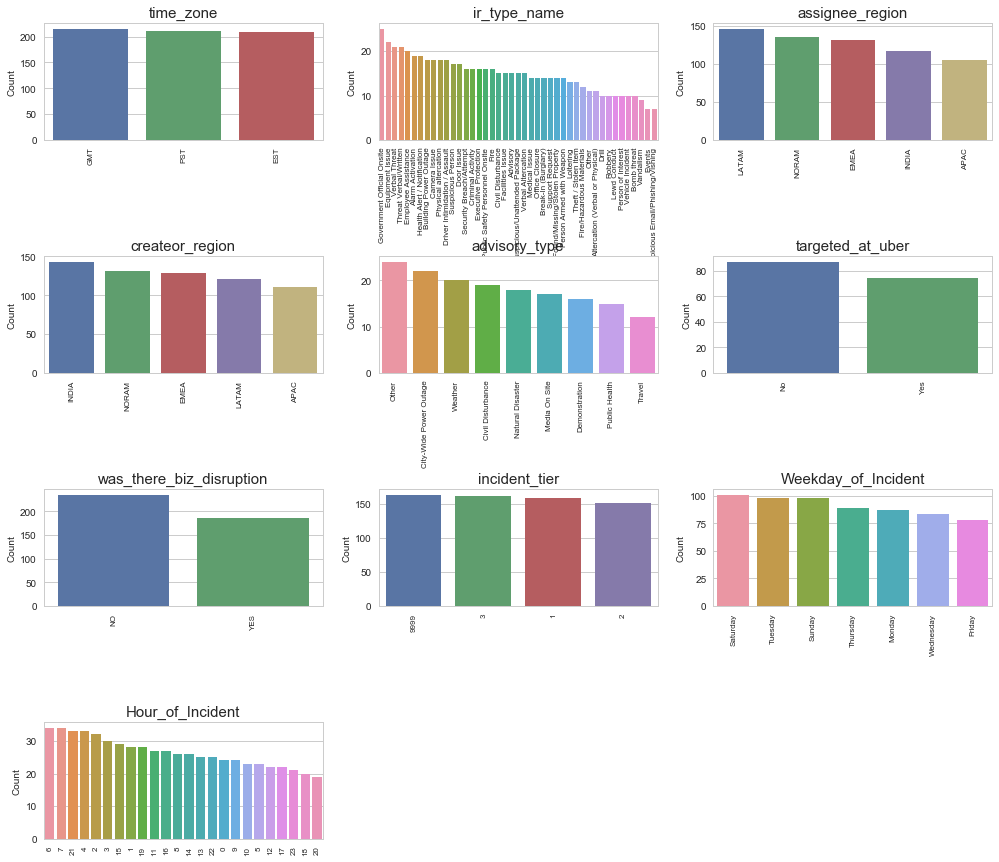

In [10]:
plot_cat(df[df.first_response_time<0])

In [11]:
df.loc[df.first_response_time<0,'first_response_time'] = np.nan
df.loc[df.First_Response_Time_Hours<0,'First_Response_Time_Hours'] = np.nan

### Resolution Time

There are no negative value errors, but there are a lot of 0 second resoltion time. These may be place holders for null values, but should be changed to such so it doesn't have an affect on summary statistics of column

In [12]:
print((df.resolution_time<0).sum(), "Errors - Less Than 0")
print((df.resolution_time==0).sum(), "0 Resolution Time")
df.loc[df.resolution_time==0,'resolution_time'] = np.nan
df.loc[df.Resolution_Time_Hours==0,'Resolution_Time_Hours'] = np.nan

0 Errors - Less Than 0
5200 0 Resolution Time


### start_date/end_date
No end date was before start date, so Incident duration was created.

There are over 3500+ missing end dates while almost half of those have a finished incident report. If needed I could impute the missing values based on similar incidents (incident type, region, etc).

In [13]:
print(((df.end_date-df.start_date).astype('timedelta64[s]') <0).sum(),' Errors')

df['Incidient_Duration'] = (df.end_date-df.start_date).astype('timedelta64[s]')
df['Incidient_Duration_Days'] = (df.Incidient_Duration/3600)/24

0  Errors


In [14]:
print(df['end_date'].isnull().sum(), 'Missing End Dates')

pd.DataFrame(df[df['end_date'].isnull()].IR_Status.value_counts())

3560 Missing End Dates


,IR_Status
Open IR,1804
Closed IR,1756


### Close_Date Errors
#### Compared to Start Date
Around half of the incident report's close date are before the report start date and even the incident date. This leads me to believe that this column is not accurate and should not be used in the analysis. 

My next steps would be to contact someone who may be managing the data source or users who are entering the information and figure out if there is a way to fix the column or if I should use the other half that does not have an error. It could be that the month/day/times are entered correctly, but not the year.

#### Report Status
Half of the data that has missing closed date is marked as having a closed incident report. It may be important to understand the duration of incident reports. An automation could be added to mark the time closed_date automatically when the status is changed to closed. 

In [15]:
print(((df.close_date-df.report_date).astype('timedelta64[s]') < 0).sum(), " Close_Date Errors - Time Before Report Start Date" ,
      '\n',
      ((df.close_date-df.start_date).astype('timedelta64[s]') < 0).sum(), " Close_Date Errors - Time Before Incident Date" ,
      '\n',
      (((df.close_date-df.report_date).astype('timedelta64[s]')).isnull()==False).sum(), "Total ")

4956  Close_Date Errors - Time Before Report Start Date 
 4916  Close_Date Errors - Time Before Incident Date 
 10241 Total 


In [16]:
pd.DataFrame(df[df['close_date'].isnull()].IR_Status.value_counts())

,IR_Status
Open IR,1585
Closed IR,1581


### Start_Date & Report Date

No errors in report_date due to starting before the incident occured

In [17]:
# Check to make sure 
df[df.start_date > df.report_date]

,ir_id,report_date,start_date,end_date,close_date,IR_Status,time_zone,ir_type_name,assignee_region,createor_region,advisory_type,targeted_at_uber,was_there_biz_disruption,incident_tier,resolution_time,first_response_time,Weekday_of_Incident,Hour_of_Incident,First_Response_Time_Hours,Resolution_Time_Hours,Incidient_Duration,Incidient_Duration_Days


# Exploration

### Targeted at Uber?
Loitering tends to be the most common targeted incident. These tend to be lower tiered incidents and happen in the evening. 

In [18]:
df.groupby(['Weekday_of_Incident'])[numerical].describe().transpose()

Weekday_of_Incident                   Friday       Monday     Saturday  \
First_Response_Time_Hours count  1778.000000  1804.000000  1823.000000   
                          mean     63.648112    62.146343    62.753670   
                          std      62.107677    61.319928    62.179545   
                          min       0.000000     0.000000     0.000000   
                          25%       0.000000     0.000000     0.000000   
                          50%      50.051111    45.973056    47.812778   
                          75%     117.873889   115.128403   116.419306   
                          max     185.149167   184.732222   185.130000   
Resolution_Time_Hours     count  1141.000000  1180.000000  1185.000000   
                          mean     91.262741    93.882027    93.883829   
                          std      53.396003    54.794269    54.328742   
                          min       0.032778     0.214167     0.028611   
                          25%      44.736389    46.795903    46.538333   
                          50%      89.168889    93.251667    95.519444   
                          75%     136.663889   140.750833   141.823333   
                          max     185.140833   184.939722   184.904722   

Weekday_of_Incident                   Sunday     Thursday      Tuesday  \
First_Response_Time_Hours count  1878.000000  1919.000000  1760.000000   
                          mean     62.030816    63.183700    63.680602   
                          std      61.975301    61.363259    61.346772   
                          min       0.000000     0.000000     0.000000   
                          25%       0.000000     0.000000     0.000000   
                          50%      45.734306    50.979722    49.907778   
                          75%     113.792500   114.263750   118.542153   
                          max     185.019444   185.066944   185.162778   
Resolution_Time_Hours     count  1176.000000  1233.000000  1132.000000   
                          mean     90.639308    93.868827    94.779686   
                          std      52.872574    55.271847    52.846973   
                          min       0.257500     0.118056     0.020000   
                          25%      45.214653    45.045000    48.157569   
                          50%      87.954028    94.622500    91.547917   
                          75%     137.280833   142.923333   142.518333   
                          max     185.126389   185.116389   184.991389   

Weekday_of_Incident                Wednesday  
First_Response_Time_Hours count  1810.000000  
                          mean     63.939226  
                          std      62.398556  
                          min       0.000000  
                          25%       0.000000  
                          50%      48.703889  
                          75%     122.007361  
                          max     185.063333  
Resolution_Time_Hours     count  1160.000000  
                          mean     94.332825  
                          std      53.662745  
                          min       0.130000  
                          25%      48.972014  
                          50%      97.098333  
                          75%     142.024028  
                          max     185.104167

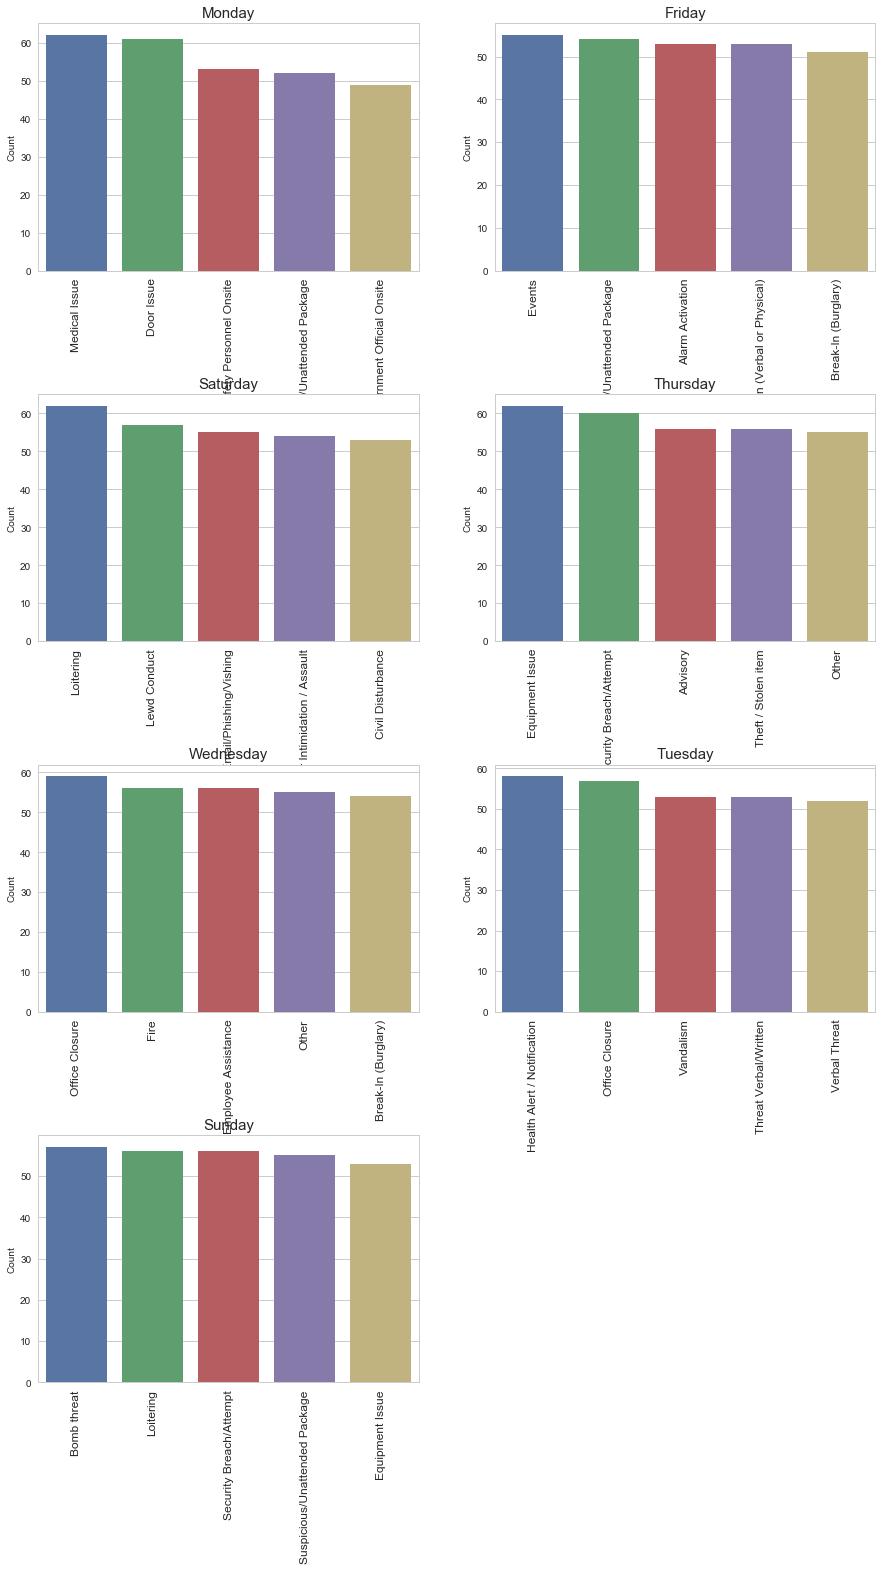

In [19]:
fig = plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace=.5)


for i, feature in enumerate(df.Weekday_of_Incident.unique()):
    plt.subplot(math.ceil(len(df.Weekday_of_Incident.unique())/2),2,i+1)
    ax = sns.countplot(df[df['Weekday_of_Incident']==feature]['ir_type_name'], order = df[df['Weekday_of_Incident']==feature]['ir_type_name'].value_counts().index[:5] )
    ax = plt.title(str(feature), size=15)
    _ = plt.xlabel('',fontsize=0)
    _ = plt.xticks(size=12, rotation = 90)
    _ = plt.ylabel('Count',fontsize=10)
    _ = plt.yticks(size=10)

## Target Incidents

Loitering is the most "targeted" incident.

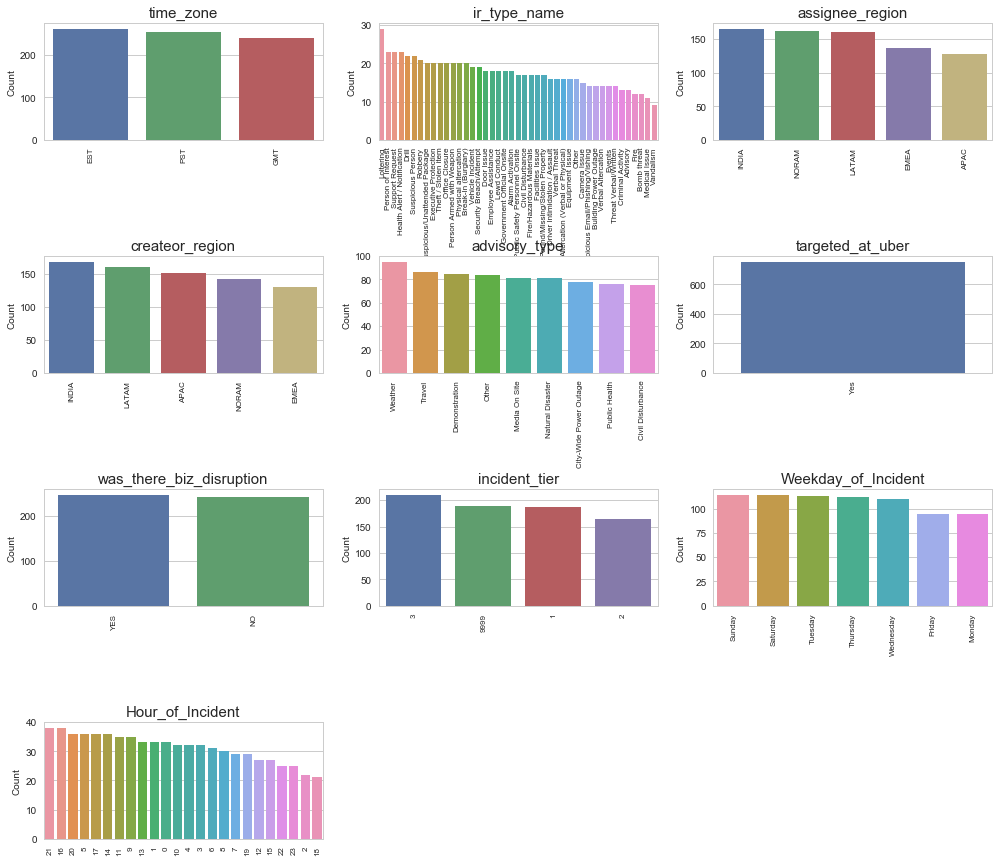

In [20]:
plot_cat(df[df.targeted_at_uber=='Yes'])

In [43]:
df[df.targeted_at_uber=='Yes']['ir_type_name'].value_counts()[:5]

Loitering                      29
Person of Interest             23
Support Request                23
Health Alert / Notification    23
Drill                          22
Name: ir_type_name, dtype: int64

## Advisory Type

Around 11% of incidents include an advisory type. They are mostly given on Thursday and are usually given when there are suspicious packages or suspicious emails

In [31]:
df.advisory_type.count()/df.shape[0]

0.11673006638323263

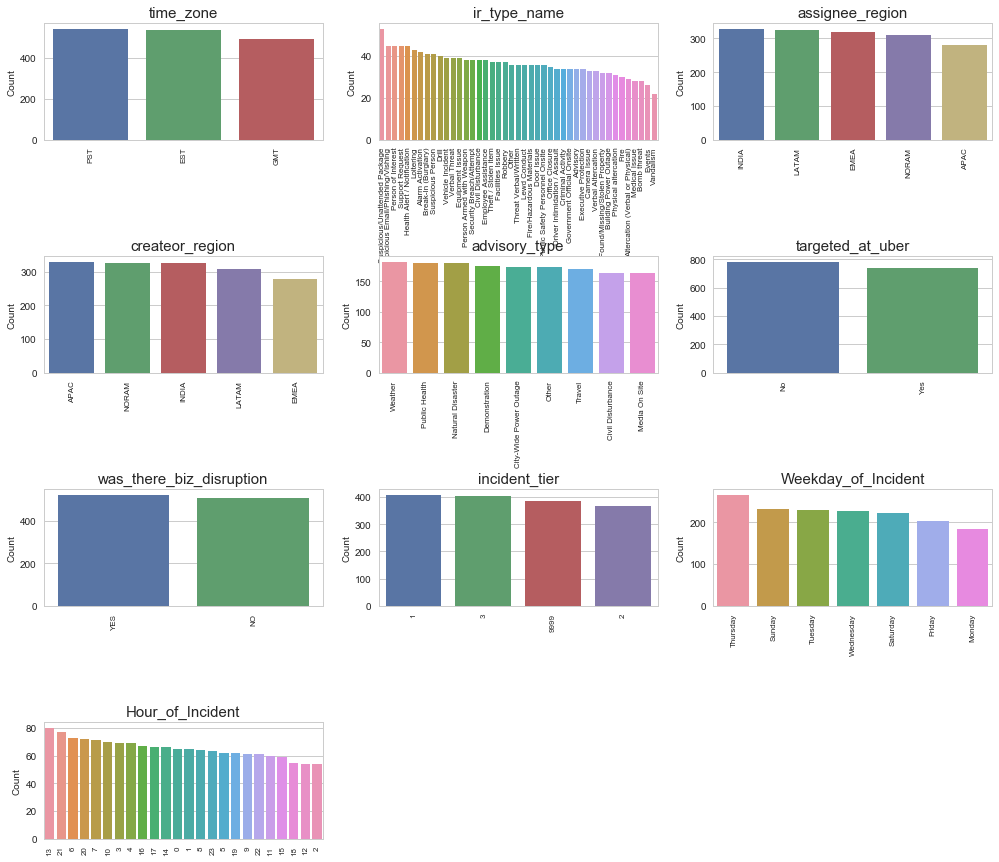

In [35]:
plot_cat(df[df.advisory_type.isnull()==False])

In [42]:
df[df.advisory_type.isnull()==False]['ir_type_name'].value_counts()[:5]

Suspicious/Unattended Package        53
Suspicious Email/Phishing/Vishing    45
Person of Interest                   45
Support Request                      45
Health Alert / Notification          45
Name: ir_type_name, dtype: int64

### Business Disruption

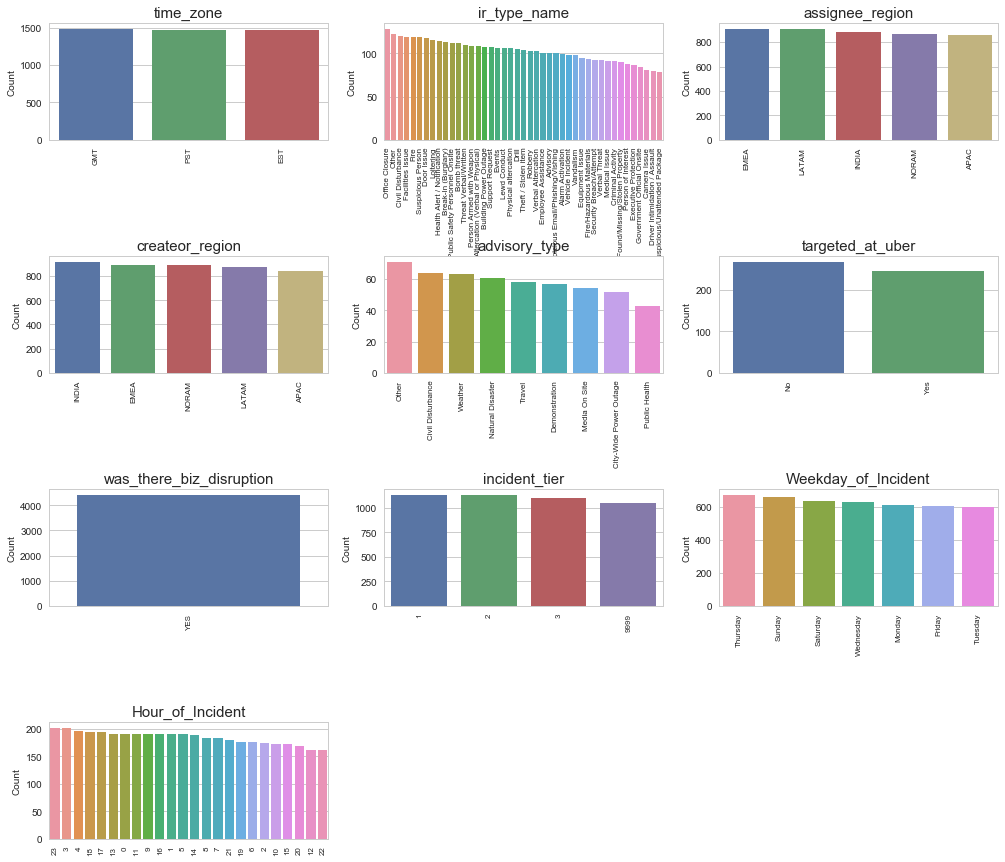

In [21]:
plot_cat(df[df.was_there_biz_disruption=='YES'])

## Open Reports

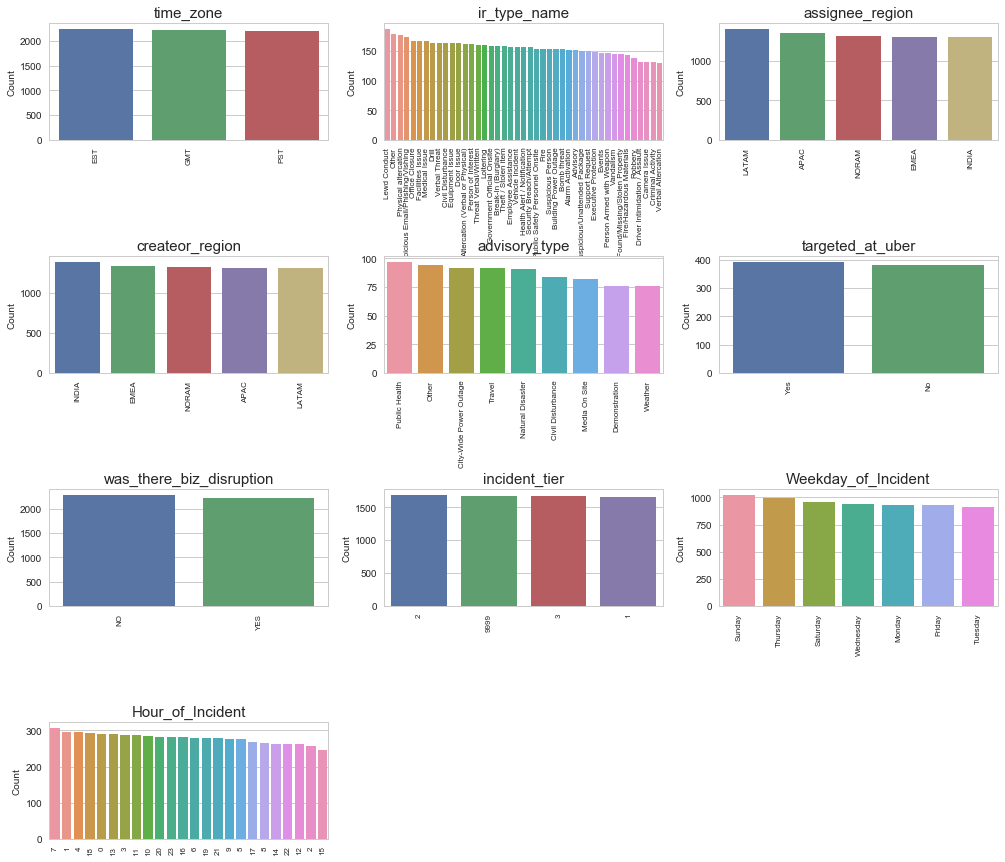

In [22]:
plot_cat(df[df.IR_Status=='Open IR'])